# ELGMask
This notebook will update the bright star mask for DESI ELGs.

## Density Fluctuations Before (Old Masking Radius)
First, let's checkout the trends when `maskbits=1, 2, 3` are applied. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import modules as ms
from astropy import units as u
from time import time

In [4]:
loader =  ms.DataLoader(maskbits=[1, 12, 13])

data_dir            : /fs/ess/PHS0336/data/elgmask
gaia_path           : /fs/ess/PHS0336/data/elgmask/gaia_lrg_mask_v1.fits
gaia_suppl_path     : /fs/ess/PHS0336/data/elgmask/gaia_reference_suppl_dr9.fits
gaia_columns        : ['RA', 'DEC', 'mask_mag']
target_class        : ELG
maskbits            : [1, 12, 13]
min_nobs            : 1



In [5]:
field = 'north'
cat = loader.read_cat(field)         # read target catalog
ran = loader.read_randoms(field)     # read random catalog
gaia = loader.read_gaia(field)       # read gaia star catalog

# ms.plot_cat_on_gaia(cat, gaia, field)
# ms.plot_cat_on_gaia(ran, gaia, field)
# ms.plot_gaia_specs(gaia)
ms.check_maskbits(cat)
ms.check_maskbits(ran)

sky2 = ms.cat2sky(cat)
sky3 = ms.cat2sky(ran)

# of targets: 11857336
# of targets (after maskbits=[1, 12, 13]): 11857336
# of targets (after LMC cut): 11857336
# of targets (after min_nobs >= 1): 11857336
# of targets: 51558408
# of targets (after maskbits=[1, 12, 13]): 50954831
# of targets (after LMC cut): 50954831
# of targets (after min_nobs >= 1): 50124760
# of gaia objects: 41065340
# of gaia objects (north): 10862797
0 (0.0%) objects flagged by maskbits
0 (0.0%) objects flagged by BRIGHT mask
568690 (4.8%) objects flagged by MEDIUM mask
0 (0.0%) objects flagged by maskbits
0 (0.0%) objects flagged by BRIGHT mask
2278833 (4.5%) objects flagged by MEDIUM mask


[-inf  4.   5.   6.   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18. ]
GAIA_G <= 4.0 268 stars
613291 nearby objects around 254 stars
2498692 nearby randoms around 254 stars
done in 56.74739718437195


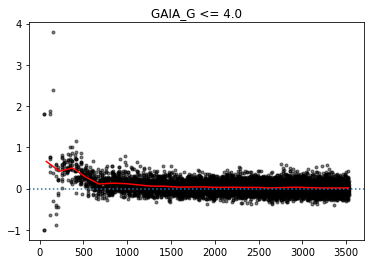

4.0 < GAIA_G <= 5.0 472 stars
1311391 nearby objects around 450 stars
5534590 nearby randoms around 451 stars
done in 29.047606706619263


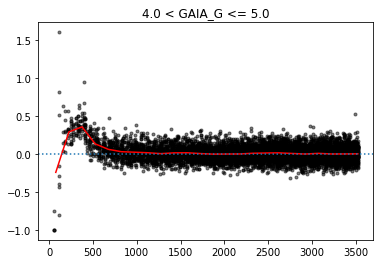

5.0 < GAIA_G <= 6.0 768 stars
2285832 nearby objects around 719 stars
9681631 nearby randoms around 719 stars
done in 31.220308542251587


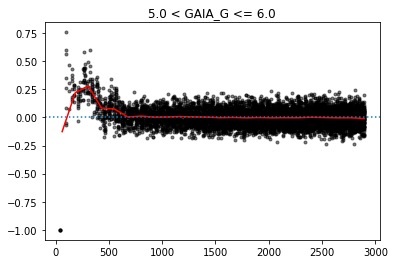

6.0 < GAIA_G <= 7.0 2020 stars
2619732 nearby objects around 1833 stars
11023102 nearby randoms around 1833 stars
done in 31.844820976257324


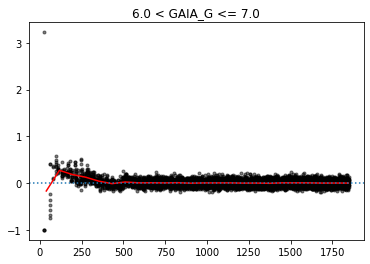

7.0 < GAIA_G <= 7.5 2018 stars
1200777 nearby objects around 1794 stars
5084366 nearby randoms around 1795 stars
done in 17.34822392463684


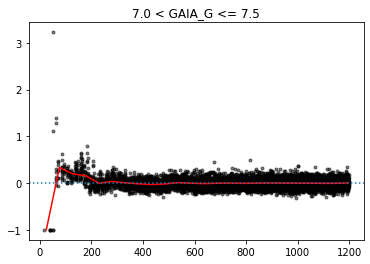

7.5 < GAIA_G <= 8.0 3258 stars
1281820 nearby objects around 2899 stars
5436997 nearby randoms around 2898 stars
done in 17.684627294540405


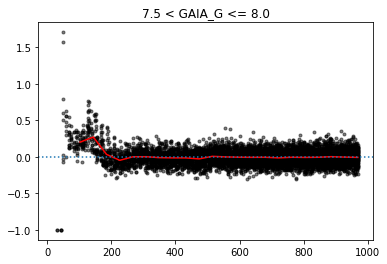

8.0 < GAIA_G <= 8.5 4864 stars
1337003 nearby objects around 4254 stars
5670477 nearby randoms around 4257 stars
done in 17.60813593864441


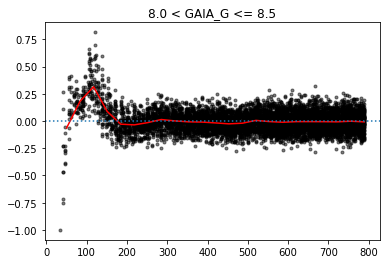

8.5 < GAIA_G <= 9.0 7494 stars
1395550 nearby objects around 6546 stars
5920552 nearby randoms around 6552 stars
done in 17.97271990776062


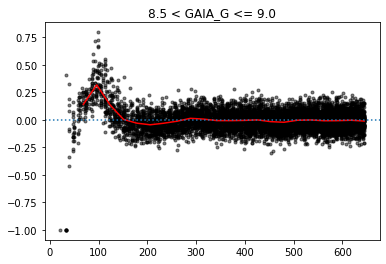

9.0 < GAIA_G <= 9.5 11635 stars
1458892 nearby objects around 10128 stars
6188282 nearby randoms around 10138 stars
done in 20.735164880752563


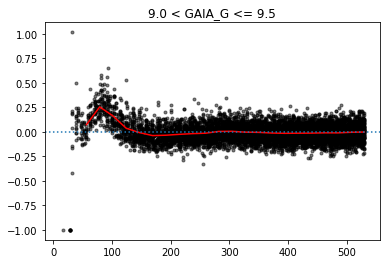

9.5 < GAIA_G <= 10.0 17426 stars
1502531 nearby objects around 15010 stars
6379598 nearby randoms around 15016 stars
done in 22.77598214149475


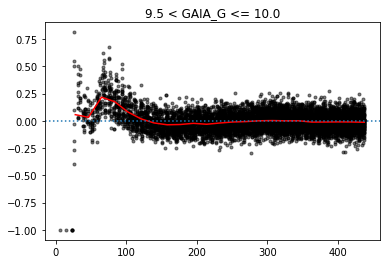

10.0 < GAIA_G <= 10.5 25540 stars
1520740 nearby objects around 21859 stars
6462408 nearby randoms around 21871 stars
done in 20.549724578857422


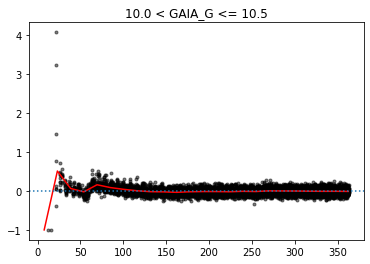

10.5 < GAIA_G <= 11.0 38364 stars
1576243 nearby objects around 32815 stars
6699400 nearby randoms around 32837 stars
done in 20.281644821166992


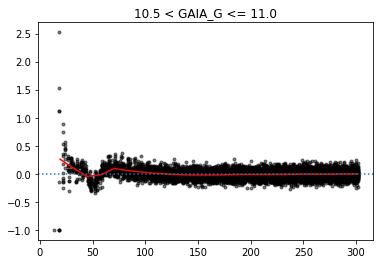

11.0 < GAIA_G <= 11.5 55978 stars
1590212 nearby objects around 47525 stars
6770030 nearby randoms around 47553 stars
done in 20.36783719062805


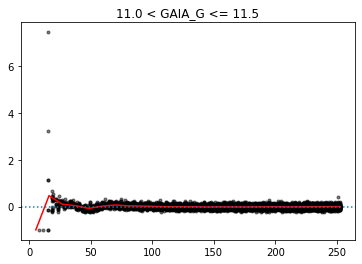

11.5 < GAIA_G <= 12.0 80807 stars
1612535 nearby objects around 68367 stars
6858860 nearby randoms around 68424 stars
done in 20.822304248809814


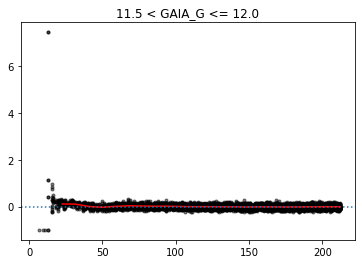

12.0 < GAIA_G <= 12.5 116382 stars
1642906 nearby objects around 97737 stars
6984611 nearby randoms around 97820 stars
done in 21.167782068252563


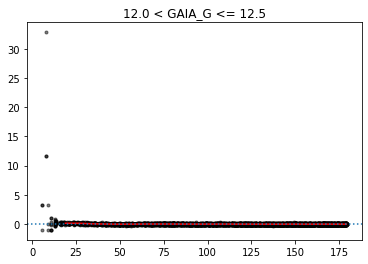

12.5 < GAIA_G <= 13.0 165059 stars
1669488 nearby objects around 138267 stars
7092755 nearby randoms around 138396 stars
done in 22.066357851028442


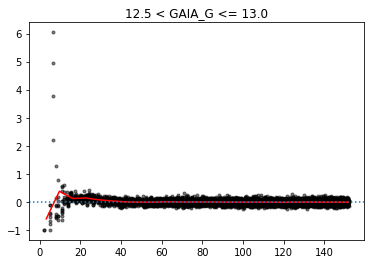

13.0 < GAIA_G <= 13.5 231611 stars
1693221 nearby objects around 193101 stars
7211229 nearby randoms around 193341 stars
done in 23.140289068222046


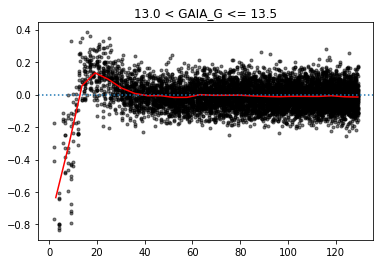

13.5 < GAIA_G <= 14.0 322018 stars
1715504 nearby objects around 267586 stars
7308382 nearby randoms around 268415 stars
done in 23.959431886672974


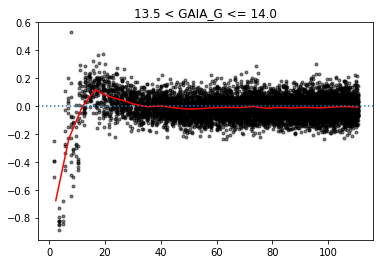

14.0 < GAIA_G <= 14.5 440274 stars
1719903 nearby objects around 362186 stars
7337303 nearby randoms around 365927 stars
done in 24.89134693145752


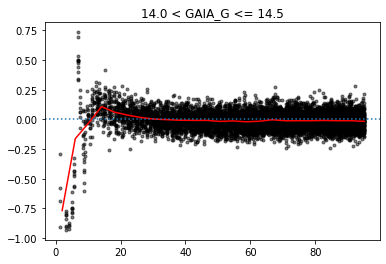

14.5 < GAIA_G <= 15.0 592503 stars
1706366 nearby objects around 474409 stars
7276491 nearby randoms around 488814 stars
done in 25.58695125579834


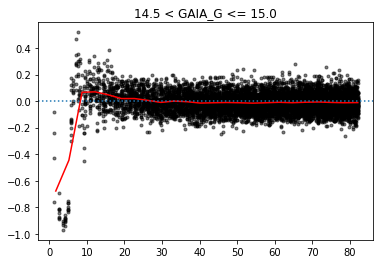

15.0 < GAIA_G <= 15.5 782952 stars
1673183 nearby objects around 597215 stars
7157094 nearby randoms around 640255 stars
done in 26.69185161590576


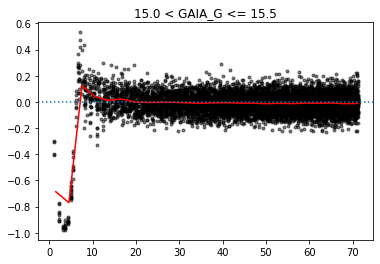

15.5 < GAIA_G <= 16.0 1016540 stars
1632669 nearby objects around 720828 stars
6989480 nearby randoms around 824589 stars
done in 27.70078182220459


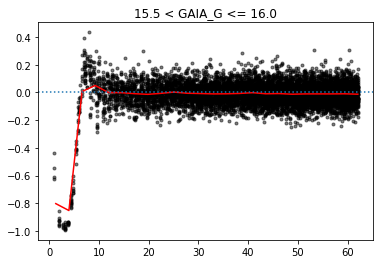

16.0 < GAIA_G <= 16.5 1292612 stars
1577369 nearby objects around 830689 stars
6746393 nearby randoms around 1037999 stars
done in 28.22738289833069


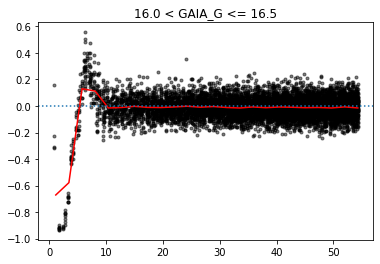

16.5 < GAIA_G <= 17.0 1615527 stars
1514614 nearby objects around 919824 stars
6485974 nearby randoms around 1282685 stars
done in 29.026915550231934


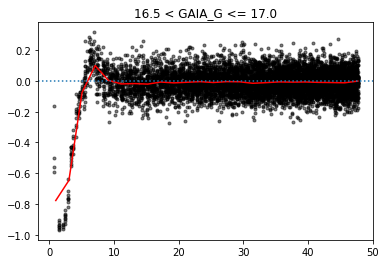

17.0 < GAIA_G <= 17.5 1966905 stars
1428786 nearby objects around 974057 stars
6140327 nearby randoms around 1537652 stars
done in 29.94206190109253


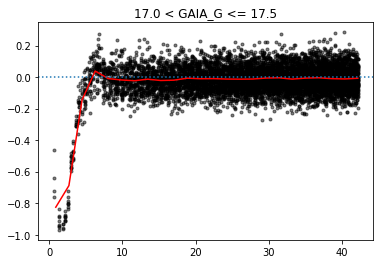

17.5 < GAIA_G <= 18.0 2069502 stars
1176232 nearby objects around 869693 stars
5057781 nearby randoms around 1559090 stars
done in 27.97721004486084


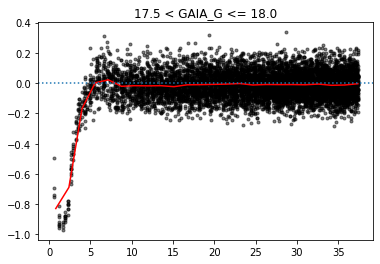

In [13]:
# mag_edges = np.percentile(gaia['mask_mag'], np.arange(0., 100, 10.0))
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())
print(gaia_mag_list)

nbins = 101

for i in range(0, len(gaia_mag_list)-1):
    
    t0 = time()
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    gaia1 = ms.select_gaia(gaia, gaia_min, gaia_max)
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max, len(gaia1))
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max, len(gaia1))
    print(title, '{} stars'.format(len(gaia1)))       
    
    search_radius = np.minimum(gaia1['radius'].max() * 4.1, 3600)
    sky1 = ms.cat2sky(gaia1)
    
    # objects
    idx1, idx2, d2d, _ = sky2.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)
    # randoms
    idx1_ran, idx2_ran, d2d_ran, _ = sky3.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)

    d2d = np.array(d2d.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra, d_dec = ms.get_residuals(gaia1[idx1], cat[idx2])
    d2d_ran = np.array(d2d_ran.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra_ran, d_dec_ran = ms.get_residuals(gaia1[idx1_ran], ran[idx2_ran])
    print('{} nearby objects around {} stars'.format(len(np.unique(idx2)), len(np.unique(idx1))))
    print('{} nearby randoms around {} stars'.format(len(np.unique(idx2_ran)), len(np.unique(idx1_ran))))
    
    bins, density, __ = ms.get_density(d_ra, d_dec, d2d, search_radius, nbins=nbins)
    bins_ran, density_ran, counts_ran = ms.get_density(d_ra_ran, d_dec_ran, d2d_ran, search_radius, nbins=nbins)
    
    sf = len(cat)/len(ran)
    reldens = ms.get_relative_density(bins, density, density_ran*sf, nbins)

    np.savez(f'dens_elg_gaia_gmag_{i}_north.npz', **{'bins':bins, 'density':density, 
                                     'density_ran':density_ran, 
                                     'counts_ran':counts_ran,
                                     'sf':sf,
                                     'reldens':reldens})
    
    print(f'done in {time()-t0}')
    
    plt.figure()
    plt.title(title)
    plt.plot(*reldens[0], color='r')
    plt.plot(reldens[1][0].flatten(), reldens[1][1].flatten()-1.0, 
         marker='.', ls='none', alpha=0.5, color='k', zorder=-10)
    plt.axhline(0.0, ls=':')
    #plt.xlim(-10., 3700.)
    #plt.ylim(-1.1, 3.2)
    plt.show()

### Radius-Magnitude Relationship
Now we obtain the radius-mag relationship from visual inspection of the trends above.

In [15]:
radii_north = [1600., 1200., 1000., 600., 400., 310., 300., 290., 250., 180., 
         120., 110., 80., 60., 30., 29., 40., 30., 30., 25., 
          20., 15., 12., 10., 10., 9.]

radii_south = [1600., 500., 400., 300., 220., 200., 190., 150., 120., 100., 
         75., 60., 50., 40., 35., 30., 25., 22., 20., 20., 20., 15., 12., 10.,
         9., 7.5]

In [20]:
mags = np.array([4.0, 9.0, 10.0, 10.5, 11.5, 12.0, 12.5, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 17.0, 18.0])
radii = np.array([429.18637985, 80.95037032, 57.98737129, 36.80882682,
        26.36735446, 25.29190318, 21.40616169, 15.33392671,
        13.74150366, 13.56870306, 12.03092488, 11.10823009,
         9.79334208, 7.01528803, 5.02527796])
log_radii = np.log10(radii)
f_radius_log_south = interp1d(mags, log_radii, bounds_error=False, fill_value='extrapolate')
f_radius_south = lambda mags: 10**f_radius_log_south(mags)


mags = np.array([4.0, 9.0, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 17.0, 18.0])
radii = np.array([429.18637985, 80.95037032, 60., 60.,
        60., 47.46123803, 38.68173428, 32.73883553,
        27.70897871, 23.45188791, 19.84883862, 16.79934664,
        13.67150555, 11.57107301, 7.83467367, 5.61223042,
         4.02022236])
log_radii = np.log10(radii)
f_radius_log_north = interp1d(mags, log_radii, bounds_error=False, fill_value='extrapolate')
f_radius_north = lambda mags: 10**f_radius_log_north(mags)

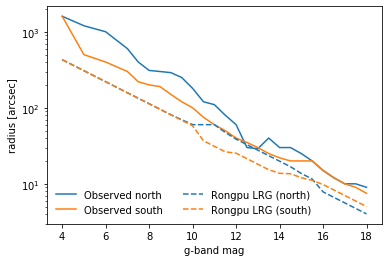

In [26]:
x = gaia_mag_list[1:]

plt.plot(gaia_mag_list[1:], radii_north, ls='-', label='Observed north')
plt.plot(gaia_mag_list[1:], radii_south, ls='-', label='Observed south')

# plt.plot(x, mag2r(x), label='Current Model', ls='--', lw=1)
# plt.plot(x, 10**(fun(x, *res[0])), label='Proposed Model', ls='-.')
plt.plot(x, f_radius_north(x), label='Rongpu LRG (north)', ls='--', color='C0')
plt.plot(x, f_radius_south(x), label='Rongpu LRG (south)', ls='--', color='C1')


plt.xlabel('g-band mag')
plt.ylabel('radius [arcsec]')
plt.legend(ncol=2, frameon=False)
plt.yscale('log')
# plt.title()
plt.savefig('rad_mag_gaia_north_south.png', dpi=300, bbox_inches='tight')

In [4]:
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())
radii = [1600., 1200., 1000., 600., 400., 310., 300., 290., 250., 180., 
         120., 110., 80., 60., 30., 29., 40., 30., 30., 25., 
          20., 15., 12., 10., 10., 9.]
print(len(gaia_mag_list), len(radii))

(27, 26)

In [5]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

mag2r = lambda mag: 1630. * 1.396**(-mag)  # the DR9 radius-mag relation

def fun(x, *p):
    return p[0]+p[1]*x+p[2]*x*x

x = gaia_mag_list[1:]
y = np.log10(radii)

res = curve_fit(fun, x, y, [1., 1., 1.])
res

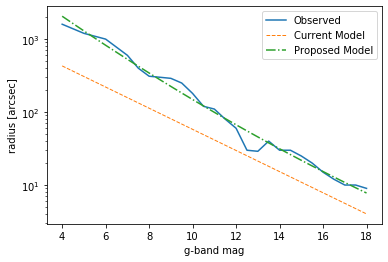

In [11]:
params = []

plt.plot(x, radii, label='Observed')
plt.plot(x, mag2r(x), label='Current Model', ls='--', lw=1)
plt.plot(x, 10**(fun(x, *res[0])), label='Proposed Model', ls='-.')
# plt.plot(x, f_radius_north(x), label='Rongpu LRG (north)')

plt.xlabel('g-band mag')
plt.ylabel('radius [arcsec]')
plt.legend()
plt.yscale('log')
plt.savefig('rad_mag_gaia_north.png', dpi=300, bbox_inches='tight')

### Flag Galaxies
In this step we use the new star radius to tag galaxies.

In [6]:
from sklearn.neighbors import KDTree

def radec2pos(ra, dec):
    """ converting ra dec to position on a unit sphere.
        ra, dec are in degrees.
    """
    pos = np.empty(len(ra), dtype=('f8', 3))
    ra = ra * (np.pi / 180)
    dec = dec * (np.pi / 180)
    pos[:, 2] = np.sin(dec)
    pos[:, 0] = np.cos(dec) * np.sin(ra)
    pos[:, 1] = np.cos(dec) * np.cos(ra)
    return pos

def veto(coord, center, R):
    """
        Returns a veto mask for coord. any coordinate within R of center
        is vet.
        Parameters
        ----------
        coord : (RA, DEC)
        center : (RA, DEC)
        R     : degrees
        Returns
        -------
        Vetomask : True for veto, False for keep.
    """
    pos_stars = radec2pos(center[0], center[1])
    R = 2 * np.sin(np.radians(R) * 0.5)
    pos_obj = radec2pos(coord[0], coord[1])
    tree = KDTree(pos_obj)
    vetoflag = np.zeros(len(pos_obj), dtype='?')
    arg = tree.query_radius(pos_stars, r=R)
    arg = np.concatenate(arg)
    vetoflag[arg] = True
    return vetoflag


# data masking
radius_deg = gaia['radius'].data / 3600 # deg
center = (gaia['RA'].data, gaia['DEC'].data)
coord = (cat['RA'].data, cat['DEC'].data)
is_bad = veto(coord, center, radius_deg)
np.save('is_bad_north.npy', is_bad)

# random masking
coordr = (ran['RA'].data, ran['DEC'].data)
is_badr = veto(coordr, center, radius_deg)
np.save('is_badr_north.npy', is_badr)

In [7]:
gaia[:4]

RA,DEC,mask_mag,radius
float64,float64,float64,float64
227.94185778,30.4285125,9.637777328491211,141.0545999846335
225.10921639,31.61496194,7.4577460289001465,323.3203406928025
228.87544306,33.31508722,3.1770057678222656,784.8927085837831
228.90955472,33.32117111,7.699368476867676,293.38526777209887


In [8]:
is_badr = np.load('is_badr_north.npy')
is_bad = np.load('is_bad_north.npy')

cat = cat[~is_bad]
ran = ran[~is_badr]

sky2 = ms.cat2sky(cat)
sky3 = ms.cat2sky(ran)

gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())
print(gaia_mag_list)

nbins = 101
for i in range(0, len(gaia_mag_list)-1):
    
    t0 = time()
    
    gaia_min, gaia_max = gaia_mag_list[i:i+2]
    gaia1 = ms.select_gaia(gaia, gaia_min, gaia_max)
    if gaia_min==-np.inf:
        title = 'GAIA_G <= {:.1f}'.format(gaia_max, len(gaia1))
    else:
        title = '{:.1f} < GAIA_G <= {:.1f}'.format(gaia_min, gaia_max, len(gaia1))
    print(title, '{} stars'.format(len(gaia1)))       
    
    search_radius = np.minimum(gaia1['radius'].max() * 4.1, 3600)
    sky1 = ms.cat2sky(gaia1)
    
    # objects
    idx1, idx2, d2d, _ = sky2.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)
    # randoms
    idx1_ran, idx2_ran, d2d_ran, _ = sky3.search_around_sky(sky1, seplimit=search_radius*ms.arcsec)

    d2d = np.array(d2d.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra, d_dec = ms.get_residuals(gaia1[idx1], cat[idx2])
    d2d_ran = np.array(d2d_ran.to(u.arcsec))  # convert distances to numpy array in arcsec
    d_ra_ran, d_dec_ran = ms.get_residuals(gaia1[idx1_ran], ran[idx2_ran])
    print('{} nearby objects around {} stars'.format(len(np.unique(idx2)), len(np.unique(idx1))))
    print('{} nearby randoms around {} stars'.format(len(np.unique(idx2_ran)), len(np.unique(idx1_ran))))
    
    bins, density, __ = ms.get_density(d_ra, d_dec, d2d, search_radius, nbins=nbins)
    bins_ran, density_ran, counts_ran = ms.get_density(d_ra_ran, d_dec_ran, d2d_ran, search_radius, nbins=nbins)
    
    sf = len(cat)/len(ran)
    reldens = ms.get_relative_density(bins, density, density_ran*sf, nbins)

    np.savez(f'dens_elg_gaia_gmag_{i}_north_after.npz', **{'bins':bins, 'density':density, 
                                                           'density_ran':density_ran, 
                                                           'counts_ran':counts_ran,
                                                           'sf':sf,
                                                           'reldens':reldens})  
    print(f'done in {time()-t0} sec')    
#     plt.figure()
#     plt.title(title)
#     plt.plot(*reldens[0], color='r')
#     plt.plot(reldens[1][0].flatten(), reldens[1][1].flatten()-1.0, 
#          marker='.', ls='none', alpha=0.5, color='k', zorder=-10)
#     plt.axhline(0.0, ls=':')
#     #plt.xlim(-10., 3700.)
#     plt.ylim(-1.1, 1.6)
#     plt.show()

[-inf  4.   5.   6.   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18. ]
GAIA_G <= 4.0 268 stars
458432 nearby objects around 254 stars
1898027 nearby randoms around 254 stars
done in 41.968730449676514 sec
4.0 < GAIA_G <= 5.0 472 stars
609122 nearby objects around 442 stars
2590408 nearby randoms around 442 stars
done in 15.141793966293335 sec
5.0 < GAIA_G <= 6.0 768 stars
1157142 nearby objects around 714 stars
4953800 nearby randoms around 714 stars
done in 17.468326568603516 sec
6.0 < GAIA_G <= 7.0 2020 stars
2591860 nearby objects around 1841 stars
11050640 nearby randoms around 1842 stars
done in 30.43003225326538 sec
7.0 < GAIA_G <= 7.5 2018 stars
2332673 nearby objects around 1826 stars
10022340 nearby randoms around 1827 stars
done in 29.365660429000854 sec
7.5 < GAIA_G <= 8.0 3258 stars
1460664 nearby objects around 2918 stars
6285074 nearby randoms around 2921 stars
done in 22.067481756210327 sec
8.0 < GAIA_G <